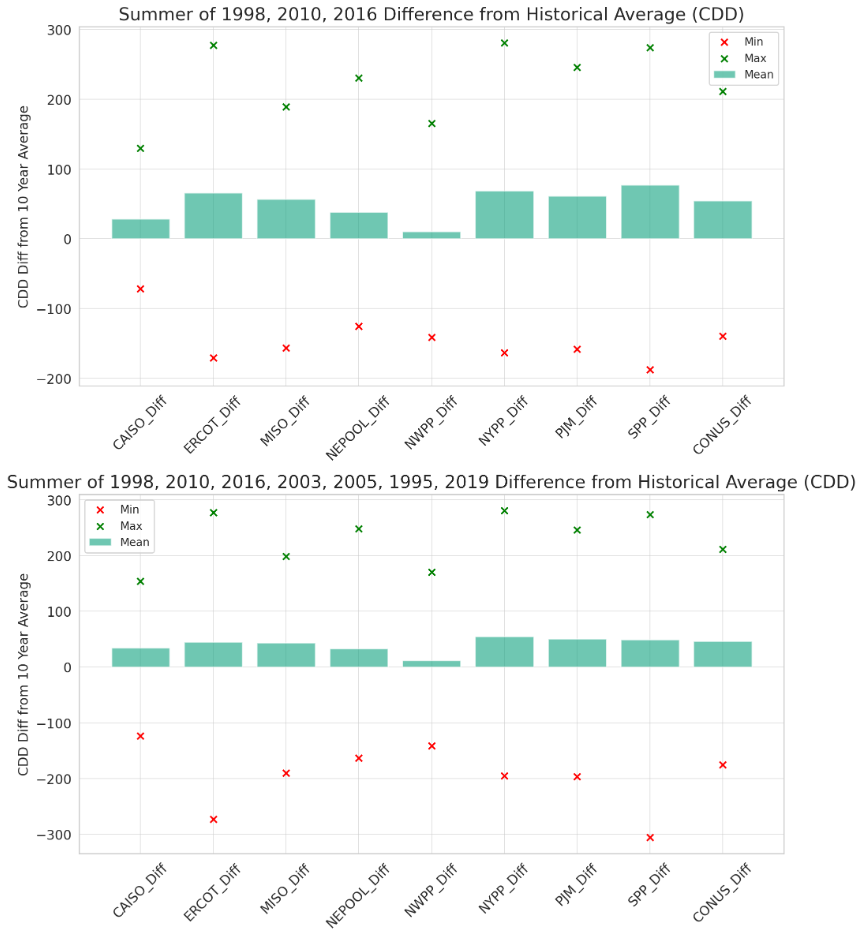

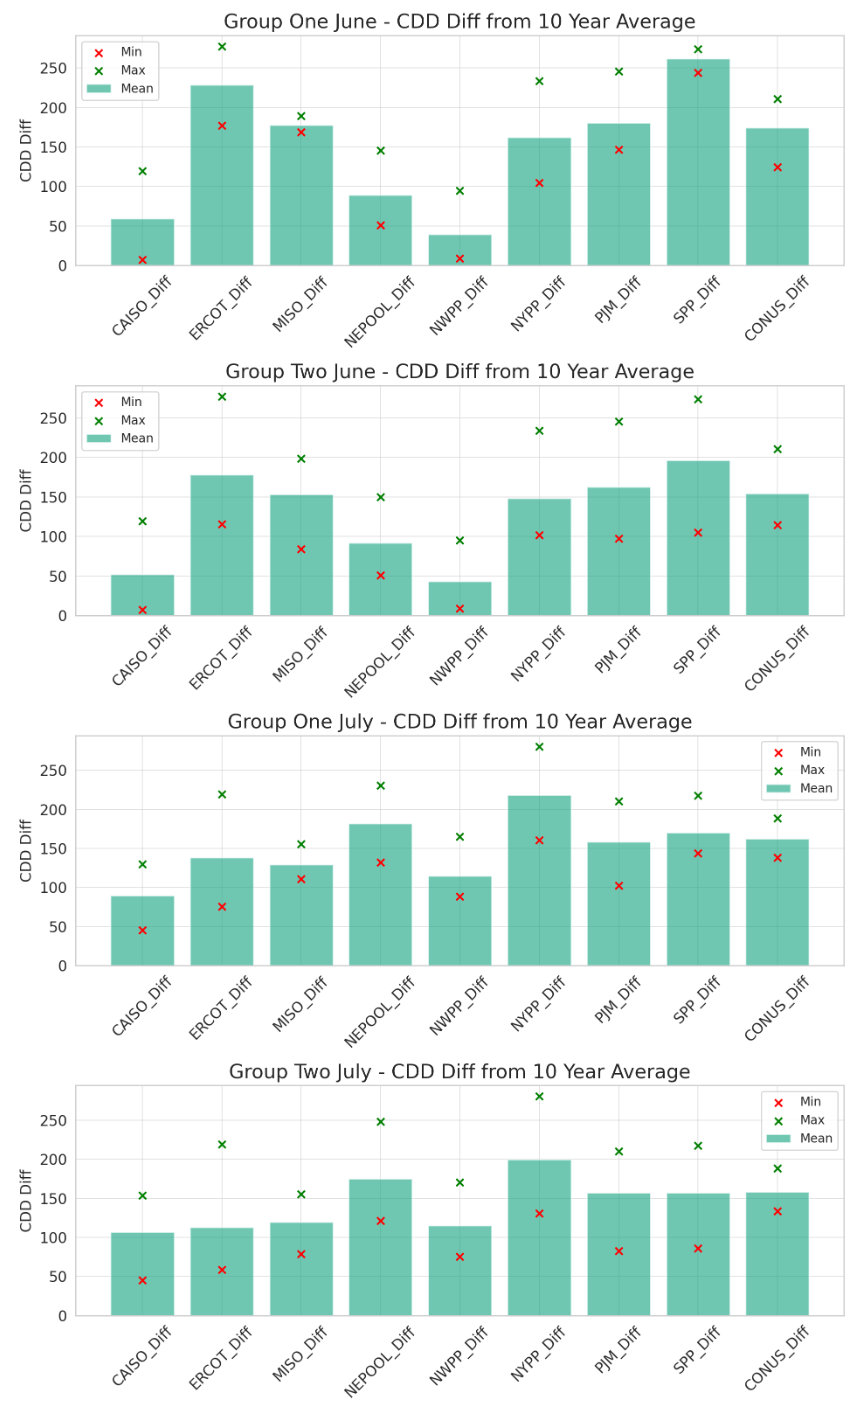

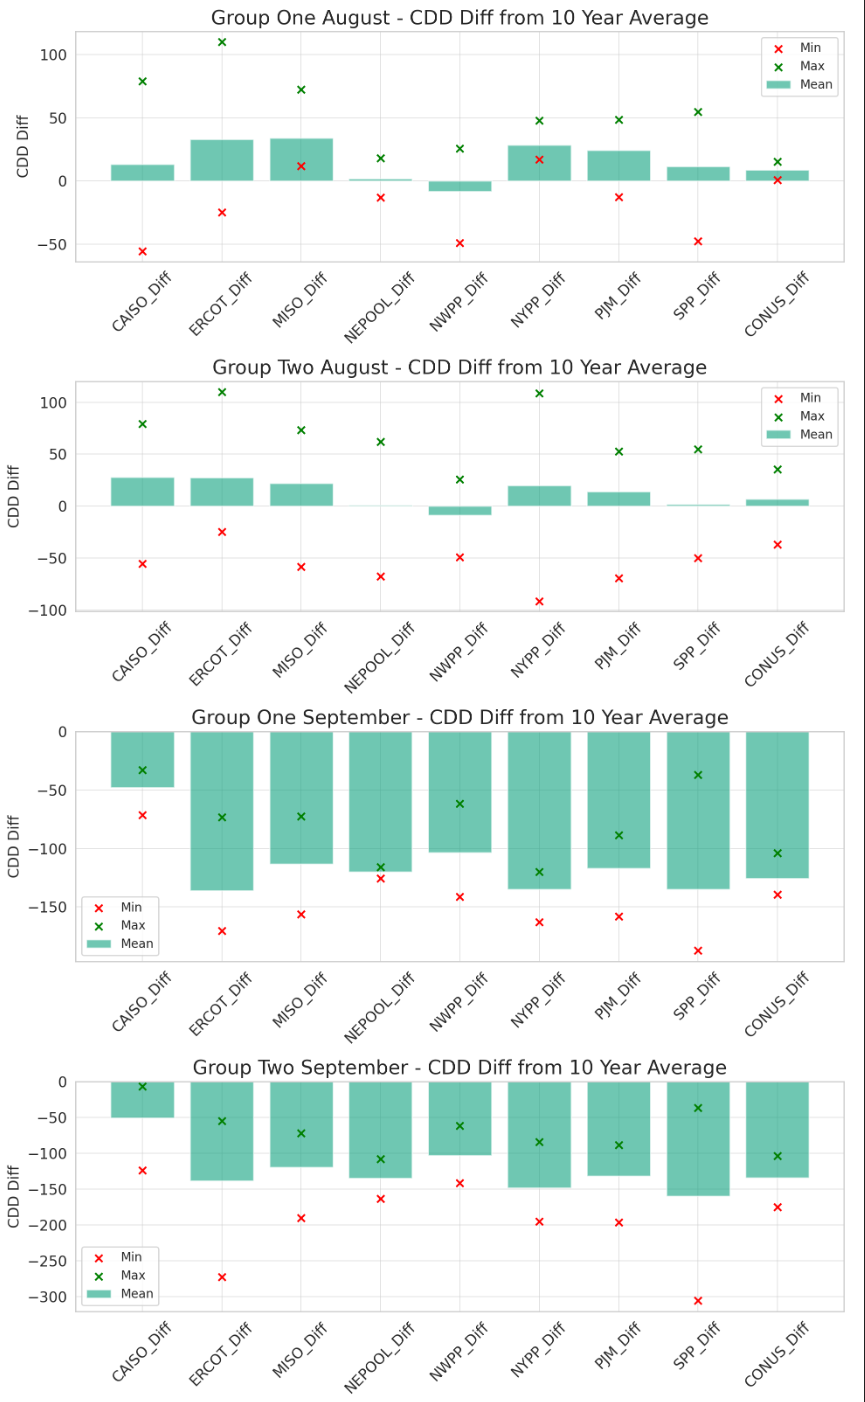

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_cdd_diffs(data, group_one_years, group_two_years, months=[6, 7, 8, 9], month_names=['June', 'July', 'August', 'September']):
    """
    Visualize the CDD differences from the 10-year rolling average for specified groups of years and months.
    
    Parameters:
    - data: DataFrame containing the dataset.
    - group_one_years: List of years for the first group.
    - group_two_years: List of years for the second group.
    - months: List of integers representing the months to analyze.
    - month_names: List of strings representing the names of the months to analyze.
    """
    # Filter data for each group
    group_one_data = data[data['Year'].isin(group_one_years)]
    group_two_data = data[data['Year'].isin(group_two_years)]
    
    # Initialize figure for subplots
    fig, axes = plt.subplots(len(months) * 2 + 1, 1, figsize=(10, 36))
    
    # List of diff columns
    diff_columns = [f'{region}_Diff' for region in ['CAISO', 'ERCOT', 'MISO', 'NEPOOL', 'NWPP', 'NYPP', 'PJM', 'SPP', 'CONUS']]
    
    # Start index for plotting
    start_idx = 0
    
    # Loop over each month to generate plots for each group
    for idx, month in enumerate(months):
        # Filter and describe data for the month in each group
        for group_data, group_years_title in zip([group_one_data, group_two_data], [group_one_years, group_two_years]):
            group_month_data = group_data[group_data['Month'] == month]
            group_month_describe = group_month_data[diff_columns].describe().loc[['min', 'mean', 'max']]
            
            # Plotting
            axes[start_idx].bar(group_month_describe.columns, group_month_describe.loc['mean'], label='Mean', alpha=0.6)
            axes[start_idx].scatter(group_month_describe.columns, group_month_describe.loc['min'], color='red', label='Min', zorder=5)
            axes[start_idx].scatter(group_month_describe.columns, group_month_describe.loc['max'], color='green', label='Max', zorder=5)
            
            # Title with specific years
            axes[start_idx].set_title(f'{month_names[idx]} {" ".join(map(str, group_years_title))} - CDD Diff from 10 Year Average')
            axes[start_idx].set_ylabel('CDD Diff')
            axes[start_idx].tick_params(axis='x', rotation=45)
            axes[start_idx].legend()
            
            start_idx += 1
            
    plt.tight_layout()
    plt.show()
